In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm 
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("C:\\Users\\karl\\Documents\\Capstone Project")

In [3]:
diabetesrate = pd.read_csv('new4.csv')
diabetesmortality = pd.read_csv('new5.csv')

In [4]:
diabetesrate.head()

,Unnamed: 0,disable,computer,poverty,a85a,a7584,a6574,black,asian,aindian,...,Adult_obesity,Food_environment_index,Physical_inactivity,Uninsured,Adult_smoking,Low_birthweight,per_Female,Excessive_drinking,Primary_care_physicians,Access_to_exercise_opportunities
0,1,17.7,77.3,12.8,2.2,6.4,10.2,4.7,0.5,0.3,...,0.267,7.1,0.240,0.077105,0.183813,0.084450,0.467162,0.206104,0.000136,0.529223
1,2,15.2,86.7,5.6,3.8,4.7,9.5,6.9,0.8,0.3,...,0.281,7.4,0.229,0.047793,0.161905,0.080979,0.492397,0.210438,0.000339,0.759314
2,3,22.3,82.4,17.9,3.0,5.9,11.0,2.6,0.7,0.2,...,0.291,6.1,0.239,0.061085,0.185910,0.093292,0.506891,0.185757,0.000733,0.776221
3,4,9.1,94.2,5.8,1.8,3.8,8.2,6.8,7.7,0.3,...,0.279,8.9,0.198,0.080919,0.138421,0.075097,0.500244,0.183697,0.001092,0.989186
4,5,13.3,88.4,7.6,2.0,5.4,9.4,1.0,0.7,0.4,...,0.319,7.8,0.284,0.107920,0.217795,0.081108,0.507555,0.177221,0.000601,0.807160


In [5]:
diabetesmortality.head()

,Unnamed: 0,disable,computer,poverty,a85a,a7584,a6574,black,asian,aindian,...,Adult_obesity,Food_environment_index,Physical_inactivity,Uninsured,Adult_smoking,Low_birthweight,per_Female,Excessive_drinking,Primary_care_physicians,Access_to_exercise_opportunities
0,1,9.1,94.2,5.8,1.8,3.8,8.2,6.8,7.7,0.3,...,0.279,8.9,0.198,0.080919,0.138421,0.075097,0.500244,0.183697,0.001092,0.989186
1,2,13.3,88.4,7.6,2.0,5.4,9.4,1.0,0.7,0.4,...,0.319,7.8,0.284,0.107920,0.217795,0.081108,0.507555,0.177221,0.000601,0.807160
2,3,16.9,82.2,8.1,2.0,5.5,9.9,0.4,0.8,0.1,...,0.336,7.5,0.313,0.113045,0.211235,0.084315,0.504704,0.161410,0.000284,0.381123
3,4,14.1,87.3,7.4,2.4,4.7,9.6,1.2,0.6,0.1,...,0.354,8.2,0.340,0.106411,0.194137,0.061167,0.504399,0.167976,0.000180,0.541003
4,5,10.3,94.2,7.9,1.4,3.2,6.5,5.3,8.1,0.3,...,0.290,7.2,0.236,0.125984,0.173088,0.069223,0.488767,0.176134,0.000710,0.783540


In [6]:
diabetesrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2410 non-null   int64  
 1   disable                           2410 non-null   float64
 2   computer                          2410 non-null   float64
 3   poverty                           2410 non-null   float64
 4   a85a                              2410 non-null   float64
 5   a7584                             2410 non-null   float64
 6   a6574                             2410 non-null   float64
 7   black                             2410 non-null   float64
 8   asian                             2410 non-null   float64
 9   aindian                           2410 non-null   float64
 10  latino                            2410 non-null   float64
 11  chci                              2410 non-null   float64
 12  sparen

In [7]:
diabetesmortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1433 non-null   int64  
 1   disable                           1433 non-null   float64
 2   computer                          1433 non-null   float64
 3   poverty                           1433 non-null   float64
 4   a85a                              1433 non-null   float64
 5   a7584                             1433 non-null   float64
 6   a6574                             1433 non-null   float64
 7   black                             1433 non-null   float64
 8   asian                             1433 non-null   float64
 9   aindian                           1433 non-null   float64
 10  latino                            1433 non-null   float64
 11  chci                              1433 non-null   float64
 12  sparen

In [8]:
diabetesrate = pd.get_dummies(diabetesrate, columns=['State'], drop_first = True)

In [9]:
diabetesmortality = pd.get_dummies(diabetesmortality, columns=['State'], drop_first = True)

In [10]:
diabetesrate = diabetesrate.drop(diabetesrate.columns[[0]], axis=1)

In [11]:
diabetesmortality = diabetesmortality.drop(diabetesmortality.columns[[0]], axis=1)

In [12]:
diabetesrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   disable                           2410 non-null   float64
 1   computer                          2410 non-null   float64
 2   poverty                           2410 non-null   float64
 3   a85a                              2410 non-null   float64
 4   a7584                             2410 non-null   float64
 5   a6574                             2410 non-null   float64
 6   black                             2410 non-null   float64
 7   asian                             2410 non-null   float64
 8   aindian                           2410 non-null   float64
 9   latino                            2410 non-null   float64
 10  chci                              2410 non-null   float64
 11  sparent                           2410 non-null   float64
 12  a5564 

In [13]:
diabetesmortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   disable                           1433 non-null   float64
 1   computer                          1433 non-null   float64
 2   poverty                           1433 non-null   float64
 3   a85a                              1433 non-null   float64
 4   a7584                             1433 non-null   float64
 5   a6574                             1433 non-null   float64
 6   black                             1433 non-null   float64
 7   asian                             1433 non-null   float64
 8   aindian                           1433 non-null   float64
 9   latino                            1433 non-null   float64
 10  chci                              1433 non-null   float64
 11  sparent                           1433 non-null   float64
 12  a5564 

rmse error is: 1.2868277516164184
Test Accuracy: 0.49


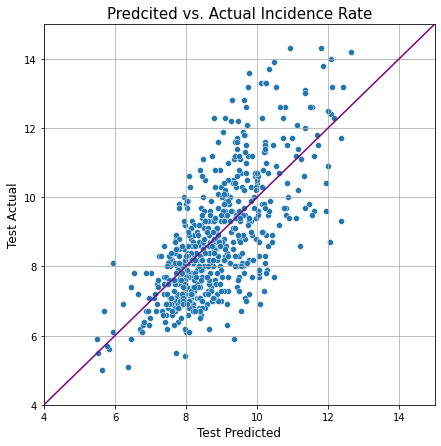

In [24]:
y = diabetesrate['Diabetes_Incidence']
X = diabetesrate.drop(['Diabetes_Incidence'], axis=1) 

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
rf01 = RandomForestRegressor(n_estimators=100, random_state=1,min_samples_split = 15, max_depth=25)
rf01.fit(X_train, y_train)
pred06 = rf01.predict(X_test)
rmse = mean_squared_error(y_test, pred06, squared=False)
print("rmse error is: " + str(rmse))
print('Test Accuracy: {:.2f}'.format(rf01.score(X_test, y_test)))

plt.figure(figsize=(7,7))
sns.scatterplot(x=pred06, y= y_test)
plt.title("Predicted vs. Actual Incidence Rate", fontsize = 15)
plt.xlabel("Test Predicted", fontsize = 12)
plt.ylabel("Test Actual", fontsize = 12)
plt.axis([4,15,4,15])
plt.plot([4,15],[4,15], color = 'purple') 
plt.grid()


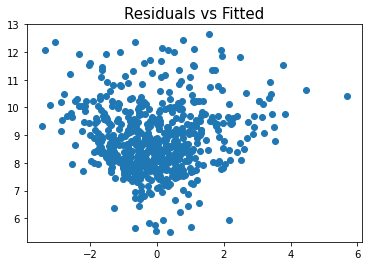

In [26]:
residuals=(y_test-pred06)
plt.scatter(residuals,pred06)
plt.title("Residuals vs Fitted", fontsize = 15)
plt.show()

rmse error is: 1.2096484565381502
Test Accuracy: 0.55


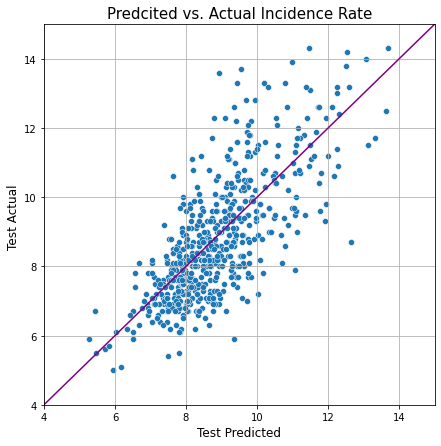

In [16]:
y = diabetesrate['Diabetes_Incidence']
X = diabetesrate.drop(['Diabetes_Incidence'], axis=1) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
xgb01 = xgb.XGBRegressor(max_depth=5, learning_rate=0.08, n_estimators=300 )
xgb01.fit(X_train, y_train)
pred07 = xgb01.predict(X_test)
rmse = mean_squared_error(y_test, pred07, squared=False)
print("rmse error is: " + str(rmse))
print('Test Accuracy: {:.2f}'.format(xgb01.score(X_test, y_test)))

plt.figure(figsize=(7,7))
sns.scatterplot(x=pred07, y= y_test)
plt.title("Predicted vs. Actual Incidence Rate", fontsize = 15)
plt.xlabel("Test Predicted", fontsize = 12)
plt.ylabel("Test Actual ", fontsize = 12)
plt.axis([4,15,4,15])
plt.plot([4,15],[4,15], color = 'purple')  
plt.grid()

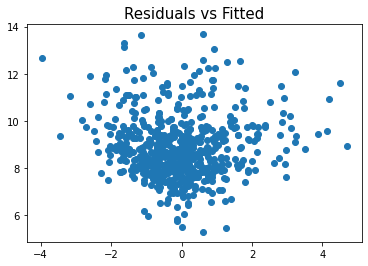

In [27]:
residuals=(y_test-pred07)
plt.scatter(residuals,pred07)
plt.title("Residuals vs Fitted", fontsize = 15)
plt.show()

rmse error is: 0.01535657460551886
Test Accuracy: 0.47


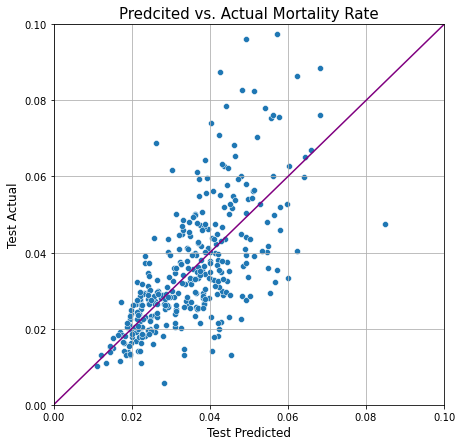

In [29]:
y = diabetesmortality['mortalityrate']
X = diabetesmortality.drop(['mortalityrate'], axis=1) 

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
rf01 = RandomForestRegressor(n_estimators=100, random_state=1,min_samples_split = 10, max_depth=10)
rf01.fit(X_train, y_train)
pred08 = rf01.predict(X_test)
rmse = mean_squared_error(y_test, pred08, squared=False)
print("rmse error is: " + str(rmse))
print('Test Accuracy: {:.2f}'.format(rf01.score(X_test, y_test)))

plt.figure(figsize=(7,7))
sns.scatterplot(x=pred08, y= y_test)
plt.title("Predicted vs. Actual Mortality Rate", fontsize = 15)
plt.xlabel("Test Predicted", fontsize = 12)
plt.ylabel("Test Actual", fontsize = 12)
plt.axis([0,.1,0,.1])
plt.plot([0,.1],[0,.1], color = 'purple') 
plt.grid()

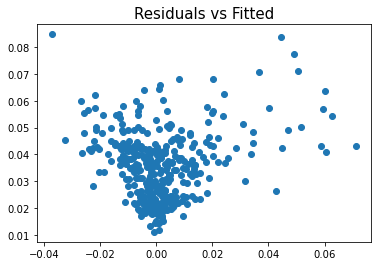

In [35]:
residuals=(y_test-pred08)
plt.scatter(residuals,pred08)
plt.title("Residuals vs Fitted", fontsize = 15)
plt.show()

rmse error is: 0.015556750786565007
Test Accuracy: 0.46


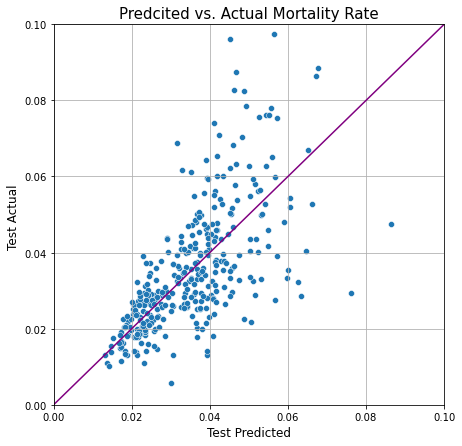

In [31]:
y = diabetesmortality['mortalityrate']
X = diabetesmortality.drop(['mortalityrate'], axis=1) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
xgb01 = xgb.XGBRegressor(max_depth=5, learning_rate=0.08, n_estimators=100)
xgb01.fit(X_train, y_train)
pred09 = xgb01.predict(X_test)
rmse = mean_squared_error(y_test, pred09, squared=False)
print("rmse error is: " + str(rmse))
print('Test Accuracy: {:.2f}'.format(xgb01.score(X_test, y_test)))

plt.figure(figsize=(7,7))
sns.scatterplot(x=pred09, y= y_test)
plt.title("Predicted vs. Actual Mortality Rate", fontsize = 15)
plt.xlabel("Test Predicted", fontsize = 12)
plt.ylabel("Test Actual ", fontsize = 12)
plt.axis([0,.1,0,.1])
plt.plot([0,.1],[0,.1], color = 'purple')  
plt.grid()

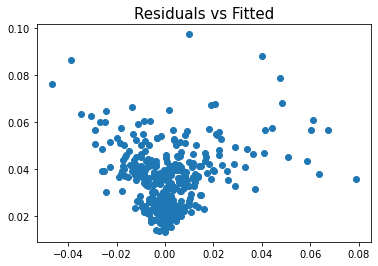

In [34]:
residuals=(y_test-pred09)
plt.scatter(residuals,pred09)
plt.title("Residuals vs Fitted", fontsize = 15)
plt.show()